In [38]:
import pandas as pd
%matplotlib inline


In [5]:
movie=pd.read_csv("tmdb-movies.csv")
movie.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [6]:
# Dropping un-necessary columns
movie.drop(['id','imdb_id','cast','director','runtime','production_companies',
            'homepage','tagline','keywords','overview','release_date'],axis=1,
           inplace=True)

In [7]:
movie.head()

,popularity,budget,revenue,original_title,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09


In [8]:
# Re-arrange columns so dataframe become more organized
movie=pd.DataFrame(movie, columns = ['original_title','genres','release_year',
                                    'popularity','revenue','revenue_adj','vote_count','vote_average',
                                     'budget','budget_adj'])

In [9]:
movie.rename(columns={'original_title':'movie_title'},inplace=True)
movie.head()

,movie_title,genres,release_year,popularity,revenue,revenue_adj,vote_count,vote_average,budget,budget_adj
0,Jurassic World,Action|Adventure|Science Fiction|Thriller,2015,32.985763,1513528810,1.392446e+09,5562,6.5,150000000,1.379999e+08
1,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,2015,28.419936,378436354,3.481613e+08,6185,7.1,150000000,1.379999e+08
2,Insurgent,Adventure|Science Fiction|Thriller,2015,13.112507,295238201,2.716190e+08,2480,6.3,110000000,1.012000e+08
3,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,2015,11.173104,2068178225,1.902723e+09,5292,7.5,200000000,1.839999e+08
4,Furious 7,Action|Crime|Thriller,2015,9.335014,1506249360,1.385749e+09,2947,7.3,190000000,1.747999e+08


In [10]:
# Find out any null values:  Only genres have 23 missing data.
movie.isnull().sum()

movie_title      0
genres          23
release_year     0
popularity       0
revenue          0
revenue_adj      0
vote_count       0
vote_average     0
budget           0
budget_adj       0
dtype: int64

In [11]:
# Drop all nulls 
movie.dropna(inplace=True)

In [12]:

movie.isnull().sum()

movie_title     0
genres          0
release_year    0
popularity      0
revenue         0
revenue_adj     0
vote_count      0
vote_average    0
budget          0
budget_adj      0
dtype: int64

In [40]:
movie.duplicated().sum()  # Whole dataset only have 1 duplicated value so it should be left along
print(movie.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10843 entries, 0 to 10865
Data columns (total 10 columns):
movie_title     10843 non-null object
genres          10843 non-null object
release_year    10843 non-null int64
popularity      10843 non-null int64
revenue         10843 non-null int64
revenue_adj     10843 non-null float64
vote_count      10843 non-null int64
vote_average    10843 non-null float64
budget          10843 non-null int64
budget_adj      10843 non-null float64
dtypes: float64(3), int64(5), object(2)
memory usage: 1.2+ MB
None


In [18]:
# Convert year into non-integer
movie.release_year.astype('category').head()
## convert popularity into int
movie['popularity'] = movie.popularity.astype(int)
movie.head()

,movie_title,genres,release_year,popularity,revenue,revenue_adj,vote_count,vote_average,budget,budget_adj
0,Jurassic World,Action|Adventure|Science Fiction|Thriller,2015,32,1513528810,1.392446e+09,5562,6.5,150000000,1.379999e+08
1,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,2015,28,378436354,3.481613e+08,6185,7.1,150000000,1.379999e+08
2,Insurgent,Adventure|Science Fiction|Thriller,2015,13,295238201,2.716190e+08,2480,6.3,110000000,1.012000e+08
3,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,2015,11,2068178225,1.902723e+09,5292,7.5,200000000,1.839999e+08
4,Furious 7,Action|Crime|Thriller,2015,9,1506249360,1.385749e+09,2947,7.3,190000000,1.747999e+08


In [19]:
# Find out the movies that have most revenues in descending orders
movie.groupby('movie_title').revenue.mean().sort_values(ascending=False)

movie_title
Avatar                                                 2.781506e+09
Star Wars: The Force Awakens                           2.068178e+09
Jurassic World                                         1.513529e+09
Furious 7                                              1.506249e+09
Avengers: Age of Ultron                                1.405036e+09
Harry Potter and the Deathly Hallows: Part 2           1.327818e+09
Iron Man 3                                             1.215440e+09
Minions                                                1.156731e+09
Transformers: Dark of the Moon                         1.123747e+09
The Lord of the Rings: The Return of the King          1.118889e+09
Skyfall                                                1.108561e+09
The Net                                                1.106280e+09
The Dark Knight Rises                                  1.081041e+09
Pirates of the Caribbean: Dead Man's Chest             1.065660e+09
Toy Story 3                         

In [20]:
movie.groupby(['genres',
               'release_year']).popularity.mean().sort_values(ascending=False)
# movie genres like Action/Adventure/Science Fiction have been in 
## most popular from years to years

genres                                             release_year
Action|Adventure|Science Fiction|Thriller          2015            30.0
Adventure|Drama|Science Fiction                    2014            24.0
Action|Science Fiction|Adventure                   2014            14.0
Adventure|Science Fiction|Thriller                 2015            13.0
Action|Adventure|Science Fiction                   2014            12.0
Adventure|Action|Science Fiction                   1977            12.0
Action|Adventure|Science Fiction|Fantasy           2015            11.0
Science Fiction|Adventure|Thriller                 2014            10.0
Action|Thriller|Science Fiction|Mystery|Adventure  2010             9.0
Western|Drama|Adventure|Thriller                   2015             9.0
Action|Adventure|Fantasy|Science Fiction           2009             9.0
Adventure|Fantasy|Action                           2002             8.0
Science Fiction|Action|Thriller|Adventure          2015             8.0


In [22]:
# Find out average votes in genres and years
movie.groupby(['genres',
               'release_year']).vote_count.mean().sort_values(ascending=False)

genres                                             release_year
Action|Thriller|Science Fiction|Mystery|Adventure  2010            9767.0
Science Fiction|Action|Adventure                   2012            8903.0
Action|Adventure|Fantasy|Science Fiction           2009            8458.0
Drama|Action|Crime|Thriller                        2008            8432.0
Drama|Western                                      2012            7375.0
Science Fiction|Adventure|Fantasy                  2012            7080.0
Adventure|Drama|Science Fiction                    2014            6498.0
Adventure|Fantasy|Action                           2012            6417.0
Action|Science Fiction|Adventure                   2008            6220.0
Adventure|Fantasy|Action                           2001            6079.0
Action|Adventure|Science Fiction|Thriller          2015            5873.5
Drama|Crime                                        1994            5754.0
Action|Science Fiction|Adventure                

In [32]:
# Find out which genres are higher revenues over years
movie.groupby(['genres','release_year']).revenue.mean().sort_values(ascending=False)

genres                                     release_year
Action|Adventure|Fantasy|Science Fiction   2009            2.781506e+09
Action|Adventure|Science Fiction|Fantasy   2015            2.068178e+09
Science Fiction|Action|Adventure           2012            1.519558e+09
Adventure|Family|Fantasy                   2011            1.327818e+09
Family|Animation|Adventure|Comedy          2015            1.156731e+09
Crime|Drama|Mystery|Thriller|Action        1995            1.106280e+09
Adventure|Fantasy|Action                   2006            1.065660e+09
Family|Fantasy|Adventure                   2010            1.025467e+09
Adventure|Action|Fantasy                   2011            1.021683e+09
Adventure|Fantasy|Action                   2012            1.017004e+09
Drama|Action|Crime|Thriller                2008            1.001922e+09
Adventure|Fantasy|Family                   2001            9.764756e+08
Adventure|Fantasy|Action                   2007            9.610000e+08
Adventur

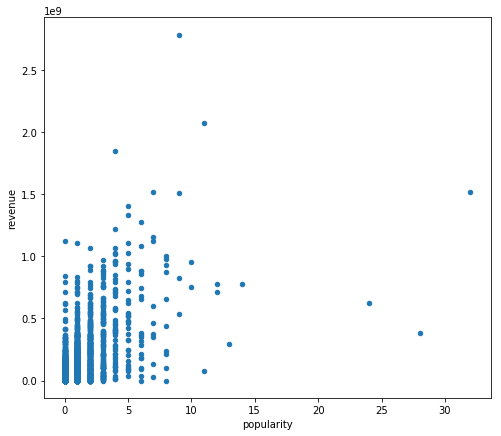

In [28]:
movie.plot(kind='scatter',x='popularity',y='revenue',figsize=(8,7))

In this scatter chart shows relations between popularity and revenue is not 
significant related to each other. only few higher popularity have high revenues.

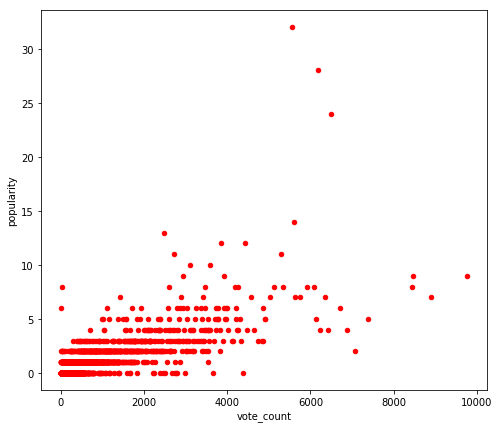

In [34]:
movie.plot(kind='scatter',x='vote_count',y='popularity',c='red',figsize=(8,7))

In this chart shows most votes doesn't mean it has higher popularity.

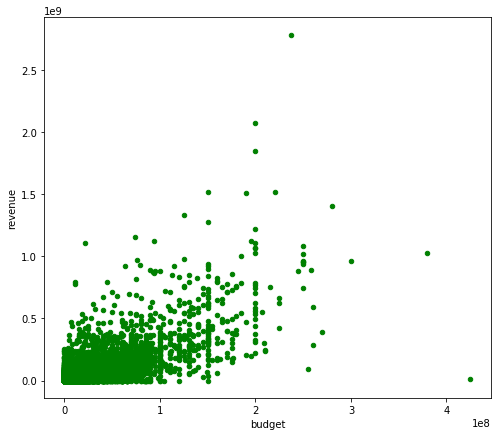

In [33]:
movie.plot(kind='scatter',x='budget',y='revenue',c='green',figsize=(8,7))

In this chart shows low budget movies have lower revenues. 
But average budgets have higher revenues.